![Cart Spring Problem Question and Diagram](imgs/cart_spring.png)

In [1]:
# Variable definitions
from mathpad import *

x1 = "x1(t)" * m
m1 = "m1" * kg

x2 = "x2(t)" * m
m2 = "m2" * kg

x3 = "x3(t)" * m
m3 = "m3" * kg

c = "c" * N * s / m
F = "F(t)" * N

tabulate(x1, x2, x3, m1, m2, m3, c, F)

┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃  Entity   ┃             Units   ┃
┣━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━┫
┃     x1(t) ┃               meter ┃
┃     x2(t) ┃               meter ┃
┃     x3(t) ┃               meter ┃
┃        m1 ┃            kilogram ┃
┃        m2 ┃            kilogram ┃
┃        m3 ┃            kilogram ┃
┃         c ┃ newton*second/meter ┃
┃      F(t) ┃              newton ┃
┗━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━━━━━┛



# Part A
TODO

# Part B

In [2]:
# Non-conservative forces

dx1, dx2, dx3 = diff([x1, x2, x3])

Qx = F - c * (dx2 - dx1) - c * (dx3 - dx1)
Qx

2*c*Derivative(x1(t), t) - c*Derivative(x2(t), t) - c*Derivative(x3(t), t) + F(t) newtons

In [3]:
# Kinetic energy
from mathpad.mech import kinetic_energy, elastic_energy, euler_lagrange

T = kinetic_energy(m1, dx1) + kinetic_energy(m2, dx2) + kinetic_energy(m3, dx3)
T

0.5*mDerivative(x1(t), t)**2 + 0.5*m2*Derivative(x2(t), t)**2 + 0.5*m3*Derivative(x3(t), t)**2 kilogram*meters**2/second**2

In [4]:
# springs 1 and 2
k1 = "k1" * N / m
k2 = "k2" * N / m

V = elastic_energy(k1, x2 - x1) + elastic_energy(k2, x3 - x2)
V

0.5*k(x1(t) - x2(t))**2 + 0.5*k2*(x2(t) - x3(t))**2 meter*newtons

In [5]:
# Euler-Lagrange dynamics

# TODO: all in one once vector support is developed
x1_dynamics = euler_lagrange(T, V, Qx, x1)
x2_dynamics = euler_lagrange(T, V, Qx, x2)
x3_dynamics = euler_lagrange(T, V, Qx, x3)

Solving Equations:


-0.x1(t) + 0.x2(t) + Derivative(x1(t), (t, 2)) = 0.2*Derivative(x1(t), t) - 0.Derivative(x2(t), t) - 0.Derivative(x3(t), t) kilogram*meter/second**2

0.x1(t) - 0.2*x2(t) + 0.x3(t) + Derivative(x2(t), (t, 2)) = 0.2*Derivative(x1(t), t) - 0.Derivative(x2(t), t) - 0.Derivative(x3(t), t) kilogram*meter/second**2

0.x2(t) - 0.x3(t) + Derivative(x3(t), (t, 2)) = 0.2*Derivative(x1(t), t) - 0.Derivative(x2(t), t) - 0.Derivative(x3(t), t) kilogram*meter/second**2

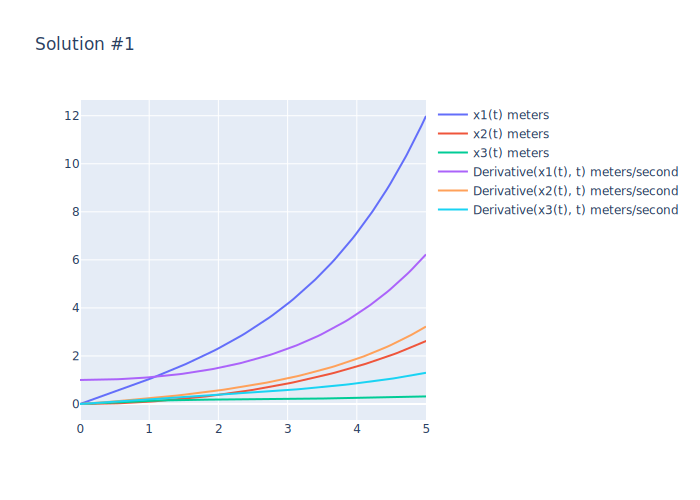

In [6]:
system_dynamics = [x1_dynamics, x2_dynamics, x3_dynamics]

data = simulate_dynamic_system(system_dynamics, x_f=5, max_step=0.1, substitute={
    k1: 0.1,
    k2: 0.1,
    F: 0,
    m1: 1,
    m2: 1,
    m3: 1,
    c: 0.1
}, initial_conditions={
    x1: 0,
    dx1: 1, 
    x2: 0,
    dx2: 0,
    x3: 0,
    dx3: 0
}, record=[x1, x2, x3, dx1, dx2, dx3], interactive_plots=False)
